# Polynomial regression approach

In [1]:
import numpy as np
import rasterio
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

### Define input file info

In [2]:
# Path to the hyperspectral image file
img_file = "../MasterThesisRCode/data/hs_raw_image/ang20190712t231624_rfl_v2v2_img"

In [3]:
# Open the image
with rasterio.open(img_file) as src:
    img_data = src.read()  # img_data shape will be (bands, height, width)

In [4]:
# Get the shape of the image
bands, height, width = img_data.shape

# Reshape to have pixels as rows and bands as columns
img_reshaped = img_data.reshape(bands, height * width).T  # Shape: (num_pixels, num_bands)


In [5]:
# Define number of clusters
n_clusters = 20  # Set this as needed

# Perform k-means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
kmeans.fit(img_reshaped)

# Get the cluster labels for each pixel
cluster_labels = kmeans.labels_

/opt/anaconda3/envs/tf-metal/lib/python3.10/site-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (17) found smaller than n_clusters (20). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


In [6]:
# Reshape the labels back to the (height, width) format
clustered_image = cluster_labels.reshape(height, width)

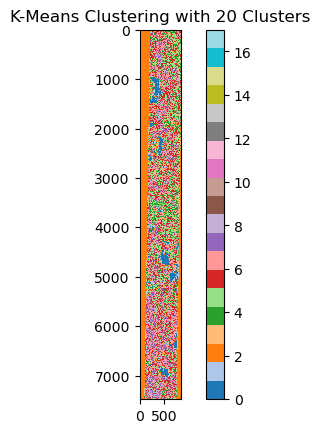

In [7]:
plt.imshow(clustered_image, cmap='tab20')  # 'tab20' provides a variety of colors
plt.colorbar()
plt.title(f"K-Means Clustering with {n_clusters} Clusters")
plt.show()

In [9]:
output_file = "clustered_hyperspectral_image.tif"
with rasterio.open(
    output_file,
    'w',
    driver='GTiff',
    height=height,
    width=width,
    count=1,  # Only one band for cluster labels
    dtype=rasterio.uint8
) as dst:
    dst.write(clustered_image.astype(np.uint8), 1)
